## Bump Chart Tutorial

According to Wikipedia, the top 10 countries in the Summer Olympics (by total medal count) are 
1. The United States
2. Russia
3. Germany
4. China
5. Great Britain
6. France
7. Italy
8. Japan
9. Hungary
10. Australia 

https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table#Summer_Olympics_(including_precursors)

The question we will study in this tutorial is how the relative order of these countries has changed from one olympics to the next.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

The following data was extracted from Wikipedia, and contains the total medal counts of each summer olympics since 2000. 

In [12]:
df = pd.read_csv("summer_olympics.csv")
df.head(10)

,Country,2000,2004,2008,2012,2016,2020,2024
0,United States,93,101,112,104,121,113,126
1,Russia,89,90,60,64,56,71,0
2,Germany,56,49,41,44,42,37,33
3,China,58,63,100,92,70,89,91
4,Great Britain,28,30,51,65,67,64,65
5,France,38,33,43,35,42,33,64
6,Italy,34,32,27,28,28,40,40
7,Japan,18,37,25,38,41,58,45
8,Hungary,17,17,10,18,15,20,19
9,Australia,58,50,46,35,29,46,53


Before we can visualize the data, we need to convert the medal counts to **rankings**. 

In [13]:
years = ["2000", "2004", "2008", "2012", "2016", "2020", "2024"]
for year in years:
    column = df[["Country", year]]
    column = column.sort_values(year, ascending=False)
    prev_count = -1 
    prev_rank = -1
    for i in range(len(column)):
        country = column.iloc[i][0] # retrieves the name of the country
        current_count = column.iloc[i][1] # retrieves the medal count        
        rank = i + 1 
        if prev_count == current_count: # countries are tied
            rank = prev_rank
        prev_rank = rank        
        prev_count = current_count
        df[year].mask(df['Country'] == country, rank, inplace=True) # updates original data frame 
df.head(10)

,Country,2000,2004,2008,2012,2016,2020,2024
0,United States,1,1,1,1,1,1,1
1,Russia,2,2,3,4,4,3,10
2,Germany,5,5,7,5,5,8,8
3,China,3,3,2,2,2,2,2
4,Great Britain,8,9,4,3,3,4,3
5,France,6,7,6,7,5,9,4
6,Italy,7,8,8,9,9,7,7
7,Japan,9,6,9,6,7,5,6
8,Hungary,10,10,10,10,10,10,9
9,Australia,3,4,5,7,8,6,5


We can now try to plot lines for each country

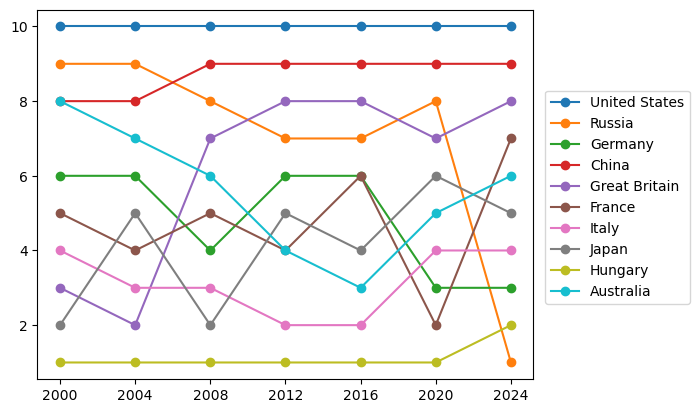

In [14]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()
for i in range(10):
    country = df.iloc[i][0]
    values = [11 - j for j in df.iloc[i][1:]]
    ax.plot(years, values, label = country, marker="o")
    
ax.set_xticks(years)
ax.legend(bbox_to_anchor=(1.01, 0.8))
plt.show()


There are a number of things to clean up in this picture, including:
* Values on y-axis show position, not rank (want top line to be rank 1)
* Lines should be labeled directly
* Put rank values direcly on graph

To start, we will change the markers from filled circles to open circles by specifying `markerfacecolor` and `markersize`

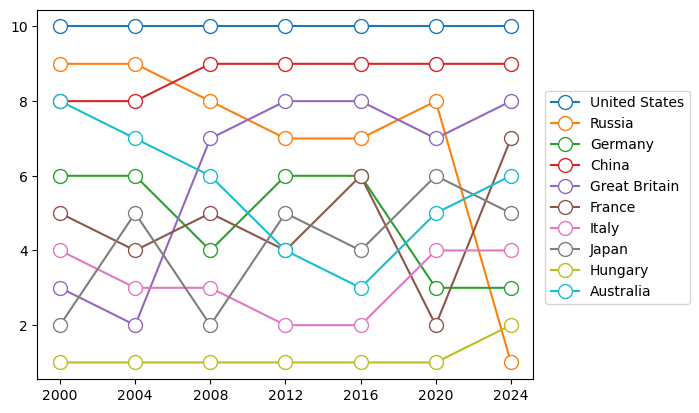

In [15]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()
for i in range(10):
    country = df.iloc[i][0]
    values = [11 - j for j in df.iloc[i][1:]]
    ax.plot(years, values, label = country, marker="o", markerfacecolor="white", markersize="10")    
    
    
ax.set_xticks(years)
ax.legend(bbox_to_anchor=(1.01, 0.8))
plt.show()


Next we will add in text specifying the ranks for each marker

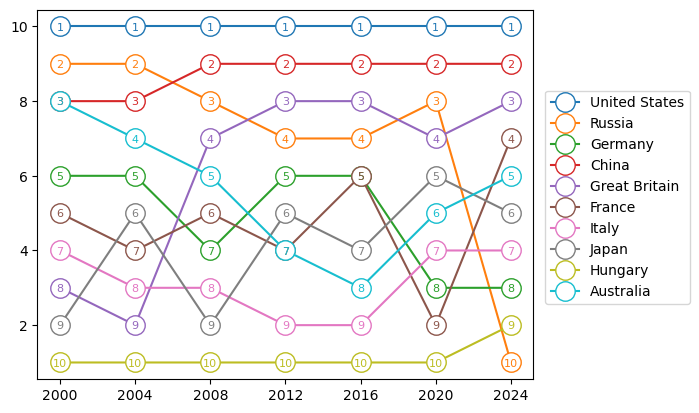

In [16]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()
for i in range(10):
    country = df.iloc[i][0]
    ranks = [j for j in df.iloc[i][1:]]
    values = [11 - j for j in df.iloc[i][1:]]
    line = ax.plot(years, values, label = country, marker="o", markerfacecolor="white", markersize="14")
    cur_color = line[0].get_color()
    for j in range(7):
        ax.text(years[j], values[j]-0.1, ranks[j], color=cur_color, fontsize=8, horizontalalignment="center")
    
    
ax.set_xticks(years)
ax.legend(bbox_to_anchor=(1.01, 0.8))
plt.show()


Next we will remove the border and the y-axis values (adding gridlines may also look nice):

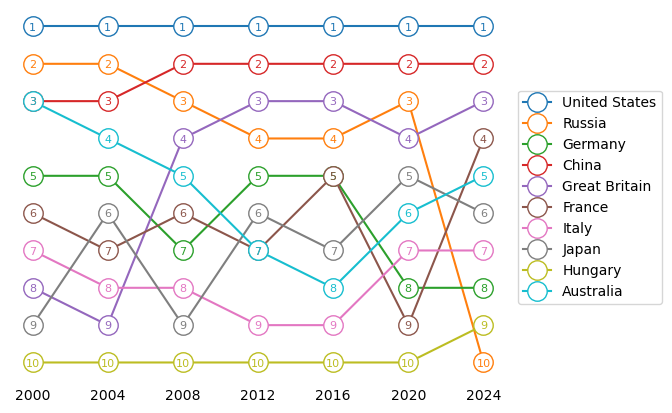

In [17]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()
for i in range(10):
    country = df.iloc[i][0]
    ranks = [j for j in df.iloc[i][1:]]
    values = [11 - j for j in df.iloc[i][1:]]
    line = ax.plot(years, values, label = country, marker="o", markerfacecolor="white", markersize="14")
    cur_color = line[0].get_color()
    for j in range(7):
        ax.text(years[j], values[j]-0.1, ranks[j], color=cur_color, fontsize=8, horizontalalignment="center")
    
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_yticks([])    
ax.set_xticks(years)

ax.legend(bbox_to_anchor=(1.01, 0.8))
plt.tick_params(axis="x", bottom=False)
plt.show()


Finally, we will fix the legend and add a title:

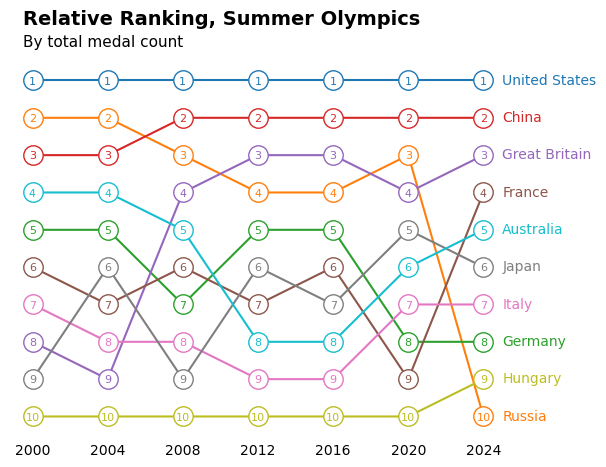

In [75]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()
for i in range(10):
    country = df.iloc[i][0]
    ranks = [j for j in df.iloc[i][1:]]
    values = [11 - j for j in df.iloc[i][1:]]
    line = ax.plot(years, values, label = country, marker="o", markerfacecolor="white", markersize="14")
    cur_color = line[0].get_color()
    for j in range(7):
        ax.text(years[j], values[j]-0.1, ranks[j], color=cur_color, fontsize=8, horizontalalignment="center")
        
    # Legend
    ax.text(2025, values[-1]-0.1, country, color=cur_color)
    
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_yticks([])    
ax.set_xticks(years)

# Title
ax.text(1999.5, 11.5, "Relative Ranking, Summer Olympics", fontweight="bold", size=14)
ax.text(1999.5, 10.9, "By total medal count", size=11)


# ax.legend(bbox_to_anchor=(1.01, 0.8))
plt.tick_params(axis="x", bottom=False)
plt.show()


## Next Iteration

The first version of the bump chart used a fixed set of countries. In reality, several countries popped in and out of the top 10 during these years. We now want to represent all countries that made it into the overall top 10 for summer olympics. 

We start with a new data table, that includes the medal counts from each country that made it into the top 10 during these years:

In [2]:
df = pd.read_csv("summer_olympics_expanded.csv")
df.head(20)

,Country,2000,2004,2008,2012,2016,2020,2024
0,United States,93,101,112,104,121,113,126
1,Russia,89,90,60,64,56,71,0
2,Germany,56,49,41,44,42,37,33
3,China,58,63,100,92,70,89,91
4,Great Britain,28,30,51,65,67,64,65
5,France,38,33,43,35,42,33,64
6,Italy,34,32,27,28,28,40,40
7,Japan,18,37,25,38,41,58,45
8,Hungary,17,17,10,18,15,20,19
9,Australia,58,50,46,35,29,46,53


We can apply our same conversion function to generate the ranks:

In [3]:
years = ["2000", "2004", "2008", "2012", "2016", "2020", "2024"]
for year in years:
    column = df[["Country", year]]
    column = column.sort_values(year, ascending=False)
    prev_count = -1 
    prev_rank = -1
    for i in range(len(column)):
        country = column.iloc[i][0] # retrieves the name of the country
        current_count = column.iloc[i][1] # retrieves the medal count        
        rank = i + 1 
        if prev_count == current_count: # countries are tied
            rank = prev_rank
        prev_rank = rank        
        prev_count = current_count
        df[year].mask(df['Country'] == country, rank, inplace=True) # updates original data frame 
df.head(20)

,Country,2000,2004,2008,2012,2016,2020,2024
0,United States,1,1,1,1,1,1,1
1,Russia,2,2,3,4,4,3,19
2,Germany,5,5,7,5,5,8,9
3,China,3,3,2,2,2,2,2
4,Great Britain,9,9,4,3,3,4,3
5,France,6,7,6,7,5,10,4
6,Italy,7,8,10,10,9,7,7
7,Japan,14,6,11,6,7,5,6
8,Hungary,15,16,17,14,16,13,14
9,Australia,3,4,5,7,8,6,5


Let's filter out countries that never make it into the top 10:

In [4]:
filter_countries = []
for i in range(len(df)):
    country = df.iloc[i][0]
    top_10 = False
    for j in range(1, len(df.iloc[i])):
        if df.iloc[i][j] <= 10:
            top_10 = True
            break
    if not top_10:
        filter_countries.append(i) # add index value of row 
print(filter_countries)
    

[8, 10, 14, 15, 17, 18]


In [5]:
df = df.drop(filter_countries)
df.head(20)

,Country,2000,2004,2008,2012,2016,2020,2024
0,United States,1,1,1,1,1,1,1
1,Russia,2,2,3,4,4,3,19
2,Germany,5,5,7,5,5,8,9
3,China,3,3,2,2,2,2,2
4,Great Britain,9,9,4,3,3,4,3
5,France,6,7,6,7,5,10,4
6,Italy,7,8,10,10,9,7,7
7,Japan,14,6,11,6,7,5,6
9,Australia,3,4,5,7,8,6,5
11,South Korea,9,9,8,9,11,13,10


Now we can remake our chart, but only put countries that made it into the top 10 during the given year:
* Some countries are always in the top 10
* Some countries pop in and out of the top 10

Right now let's plot everything, but limit the window size to the top-10 positions:

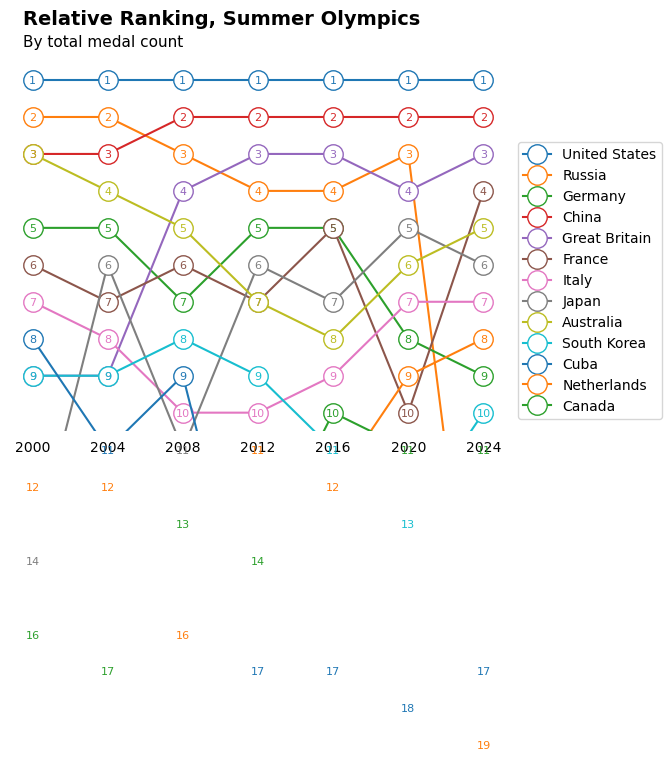

In [6]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()
for i in range(len(df)):
    country = df.iloc[i][0]
    ranks = [j for j in df.iloc[i][1:]]
    values = [11 - j for j in df.iloc[i][1:]]
    line = ax.plot(years, values, label = country, marker="o", markerfacecolor="white", markersize="14")
    cur_color = line[0].get_color()
    for j in range(7):
        ax.text(years[j], values[j]-0.1, ranks[j], color=cur_color, fontsize=8, horizontalalignment="center")
        
    # Legend
    # ax.text(2025, values[-1]-0.1, country, color=cur_color)
    
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_yticks([])    
ax.set_xticks(years)

# Title
ax.text(1999.5, 11.5, "Relative Ranking, Summer Olympics", fontweight="bold", size=14)
ax.text(1999.5, 10.9, "By total medal count", size=11)

# Restrict window size
ax.set_ylim(0.5, 10.5)

ax.legend(bbox_to_anchor=(1.01, 0.8))

plt.tick_params(axis="x", bottom=False)
plt.show()


That's bit messy, since the values (and lines) below the x-axis still show up. And notice that the default colors cycle back after 10. So we'll need remove values from the arrays we're plotting if the ranks are below 10, and we'll need to decide on a new color scheme. Let's tackle removing the extra values first:

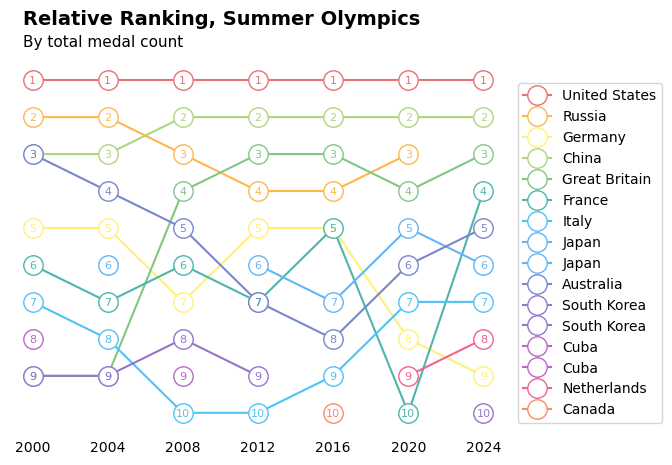

In [47]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()

# rainbow color cycle, generated with AI
hex_values = ["#FF0000", # (Red)
              "#FF4500", # (Orange Red)
              "#FF7F00", # (Orange)
              "#FFD700", # (Gold)
              "#FFFF00", # (Yellow)
              "#ADFF2F", # (Green Yellow)
              "#00FF00", # (Green)
              "#00FF7F", # (Spring Green)
              "#00FFFF", # (Cyan)
              "#1E90FF", # (Dodger Blue)
              "#0000FF", # (Blue)
              "#8A2BE2", # (Blue Violet)
              "#FF00FF"] # (Magenta)

# Lighter colors, generated with AI
hex_vals_light = ["#E57373", # (Light Red)
                  "#FFB74D", # (Light Orange)
                  "#FFF176", # (Light Yellow)
                  "#AED581", # (Light Green)
                  "#81C784", # (Medium Green)
                  "#4DB6AC", # (Light Teal)
                  "#4FC3F7", # (Light Blue)
                  "#64B5F6", # (Medium Blue)
                  "#7986CB", # (Light Indigo)
                  "#9575CD", # (Light Violet)
                  "#BA68C8", # (Light Purple)
                  "#F06292", # (Light Pink)
                  "#FF8A65"] # (Light Coral)]

def split_arrays(values, years):
    
    years_lists = []
    vals_lists = []
    
    cur_years = []
    cur_vals = []
    
    for i in range(len(values)):
        if values[i] >= 1:
            cur_years.append(years[i])
            cur_vals.append(values[i])
        else:
            if cur_vals:
                years_lists.append(cur_years)
                vals_lists.append(cur_vals)
            cur_years = []
            cur_vals = []
    if cur_vals:
        years_lists.append(cur_years)
        vals_lists.append(cur_vals)     
            
    return vals_lists, years_lists    
        
for i in range(len(df)):
    country = df.iloc[i][0]
    ranks = [j for j in df.iloc[i][1:]]
    values = [11 - j for j in df.iloc[i][1:]]
    
    # check for breaks
    vals_lists, years_lists = split_arrays(values, years)
    
    cur_color = hex_vals_light[i]
    
    for j in range(len(vals_lists)):
        cur_years = years_lists[j]
        cur_vals = vals_lists[j]
        
        line = ax.plot(cur_years, cur_vals, label = country, marker="o", markerfacecolor="white", markersize="14", color=cur_color)
        for k in range(len(cur_years)):
            ax.text(cur_years[k], cur_vals[k]-0.1, 11 - cur_vals[k], color=cur_color, fontsize=8, horizontalalignment="center")
        
    # Legend
    # ax.text(2025, values[-1]-0.1, country, color=cur_color)
    
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_yticks([])    
ax.set_xticks(years)

# Title
ax.text(1999.5, 11.5, "Relative Ranking, Summer Olympics", fontweight="bold", size=14)
ax.text(1999.5, 10.9, "By total medal count", size=11)

# Restrict window size
ax.set_ylim(0.5, 10.5)

ax.legend(bbox_to_anchor=(1.01, 0.96))

plt.tick_params(axis="x", bottom=False)
plt.show()


Some final fixes:
* note that disconnected countries appeal in the legend more than once
* the yellow for Germany is hard to read, so we will try darkening it

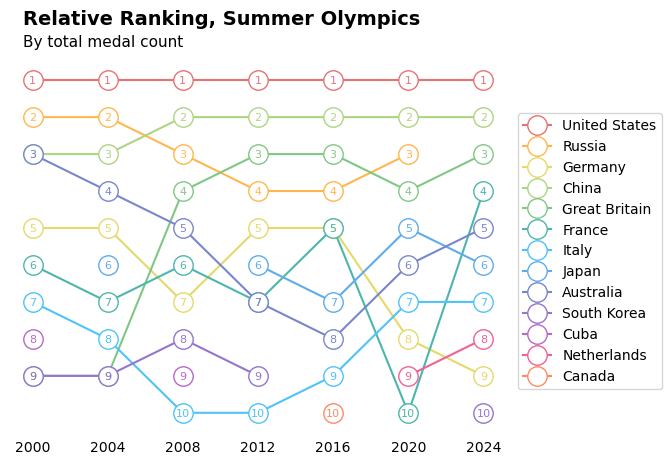

In [18]:
years = list(range(2000, 2025, 4))

fig, ax = plt.subplots()

# Lighter colors, generated with AI
hex_vals_light = ["#E57373", # (Light Red)
                  "#FFB74D", # (Light Orange)
                  "#E5D96A", # (Light Yellow)
                  "#AED581", # (Light Green)
                  "#81C784", # (Medium Green)
                  "#4DB6AC", # (Light Teal)
                  "#4FC3F7", # (Light Blue)
                  "#5FACEA", # (Medium Blue)
                  "#7986CB", # (Light Indigo)
                  "#9575CD", # (Light Violet)
                  "#BA68C8", # (Light Purple)
                  "#F06292", # (Light Pink)
                  "#FF8A65"] # (Light Coral)]

def split_arrays(values, years):
    
    years_lists = []
    vals_lists = []
    
    cur_years = []
    cur_vals = []
    
    for i in range(len(values)):
        if values[i] >= 1:
            cur_years.append(years[i])
            cur_vals.append(values[i])
        else:
            if cur_vals:
                years_lists.append(cur_years)
                vals_lists.append(cur_vals)
            cur_years = []
            cur_vals = []
    if cur_vals:
        years_lists.append(cur_years)
        vals_lists.append(cur_vals)     
            
    return vals_lists, years_lists    
        
for i in range(len(df)):
    country = df.iloc[i][0]
    ranks = [j for j in df.iloc[i][1:]]
    values = [11 - j for j in df.iloc[i][1:]]
    
    # check for breaks
    vals_lists, years_lists = split_arrays(values, years)
    
    cur_color = hex_vals_light[i]
    
    line_counter = 1
    for j in range(len(vals_lists)):
        cur_years = years_lists[j]
        cur_vals = vals_lists[j]
        if line_counter == 1:
            ax.plot(cur_years, cur_vals, label = country, marker="o", markerfacecolor="white", markersize="14", color=cur_color)
            line_counter += 1
        else:
            ax.plot(cur_years, cur_vals, marker="o", markerfacecolor="white", markersize="14", color=cur_color)            
        for k in range(len(cur_years)):
            ax.text(cur_years[k], cur_vals[k]-0.1, 11 - cur_vals[k], color=cur_color, fontsize=8, horizontalalignment="center")
        
    # Legend
    # ax.text(2025, values[-1]-0.1, country, color=cur_color)
    
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_yticks([])    
ax.set_xticks(years)

# Title
ax.text(1999.5, 11.5, "Relative Ranking, Summer Olympics", fontweight="bold", size=14)
ax.text(1999.5, 10.9, "By total medal count", size=11)

# Restrict window size
ax.set_ylim(0.5, 10.5)

ax.legend(bbox_to_anchor=(1.01, 0.88))

plt.tick_params(axis="x", bottom=False)
plt.show()
